In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import mean
from numpy import median
import matplotlib.pyplot as plt

%matplotlib inline

### Read in the CSV Files from Zoho

In [2]:
df = pd.read_csv('invoice.csv')

### Drop unneccesary columns

In [3]:
df = df.drop(['Invoice ID','Estimate Number','Customer ID','VAT Treatment','VAT ID','Place Of Supply',
         'Invoice Level Tax','Invoice Level Tax %','Invoice Level Tax Type','Invoice Level Tax Exemption Reason',
         'Shipping City', 'Shipping State','Shipping Country','Shipping Code',
         'Shipping Fax','Shipping Phone Number','Due Date','Expected Payment Date',
         'PurchaseOrder','Template Name','Currency Code','Exchange Rate',
         'Discount Type','Is Discount Before Tax','Entity Discount Percent','Entity Discount Amount',
         'Shipping Charge','Adjustment','Adjustment Description','Payment Terms',
         'Payment Terms Label','Last Payment Date','Notes','Terms & Conditions','Recurrence Name',
         'PayPal','Authorize.Net','Google Checkout','Payflow Pro','Stripe','2Checkout','Braintree','Forte',
         'WorldPay','Payments Pro','Square','WePay','Razorpay','GoCardless','Partial Payments',
         'Product ID','Billing Address','Billing City','Billing State','Billing Country',
         'Billing Code','Billing Phone','Billing Fax','Shipping Address','Shipping City',
         'Shipping State','Shipping Country','Shipping Code','Shipping Fax','Shipping Phone Number',
         'Shipping Bill Total','PortCode','Account','Is Inclusive Tax','Invoice Status',
         'Discount','Discount Amount','Shipping Bill#','Shipping Bill Date','Custom Charges',
         'Tax ID','Expense Reference ID','Item Tax','Item Tax %','Item Tax Exemption Reason',
         'Item Type','Item Tax Type','Item Tax Amount','Usage unit','CF.Delivery Status',
         'CF.Frame/SG', 'CF.Lens','Item Price','Item Total','SubTotal','Item Desc','Quantity',
         'Customer Name','CF.Eye Test'], axis = 1)

### Correct Data-types, keep values for 2018 only and sort

In [4]:
df['Invoice Date'] =  pd.to_datetime(df['Invoice Date'])
# df['Sales person'] = df['Sales person'].astype('|S')

df = df[df['Invoice Date'].dt.year == 2018]
df = df.sort_values(by='Invoice Date')

### Remove duplicate rows and NaN salesman values

In [5]:
df = df.drop_duplicates(subset=['Invoice Number'], keep='first')
# df = df[df['Sales person'].notnull()]

In [6]:
df

,Unnamed: 0,Unnamed: 0.1,Invoice Date,Invoice Number,Item Name,Total,Balance,Sales person
0,0,0,2018-01-01,19569,Glass WT KT,85.0,0.0,salesperson_01
16,16,16,2018-01-01,5793,RTA Eye Test,157.0,0.0,salesperson_02
15,15,15,2018-01-01,5792,Sunglass,200.0,0.0,salesperson_03
12,12,12,2018-01-01,19575,Frame,210.0,0.0,salesperson_03
9,9,9,2018-01-01,19573,Frame,500.0,0.0,salesperson_04
6,6,6,2018-01-01,19572,NaN,700.0,0.0,salesperson_03
3,3,3,2018-01-01,19571,CR WT KT,100.0,0.0,salesperson_04
2,2,2,2018-01-01,19570,Frame,462.0,0.0,salesperson_02
25,25,25,2018-01-02,19580,CR PG V2 ARC,360.0,0.0,salesperson_03
30,30,30,2018-01-02,5798,NaN,5.0,0.0,salesperson_04


### Create new columns, year, month, day and day of month

In [7]:
df['Day month'] = df['Invoice Date'].dt.day
df['Month'] = df['Invoice Date'].dt.month
df['Day week'] = df['Invoice Date'].dt.day_name()

### Remove Outlier (temporay staff) salesperson_06

In [8]:
df_irfan = df[df['Sales person'] == 'salesperson_06']
print("salesperson_06 total sales: ", sum(df_irfan['Total']))
df = df[df['Sales person'] != 'salesperson_06']

salesperson_06 total sales:  2107.0


### Increase Figure Size

In [9]:
sns.set(rc={'figure.figsize':(22,15)})

# Total Sale by Sales person for the year

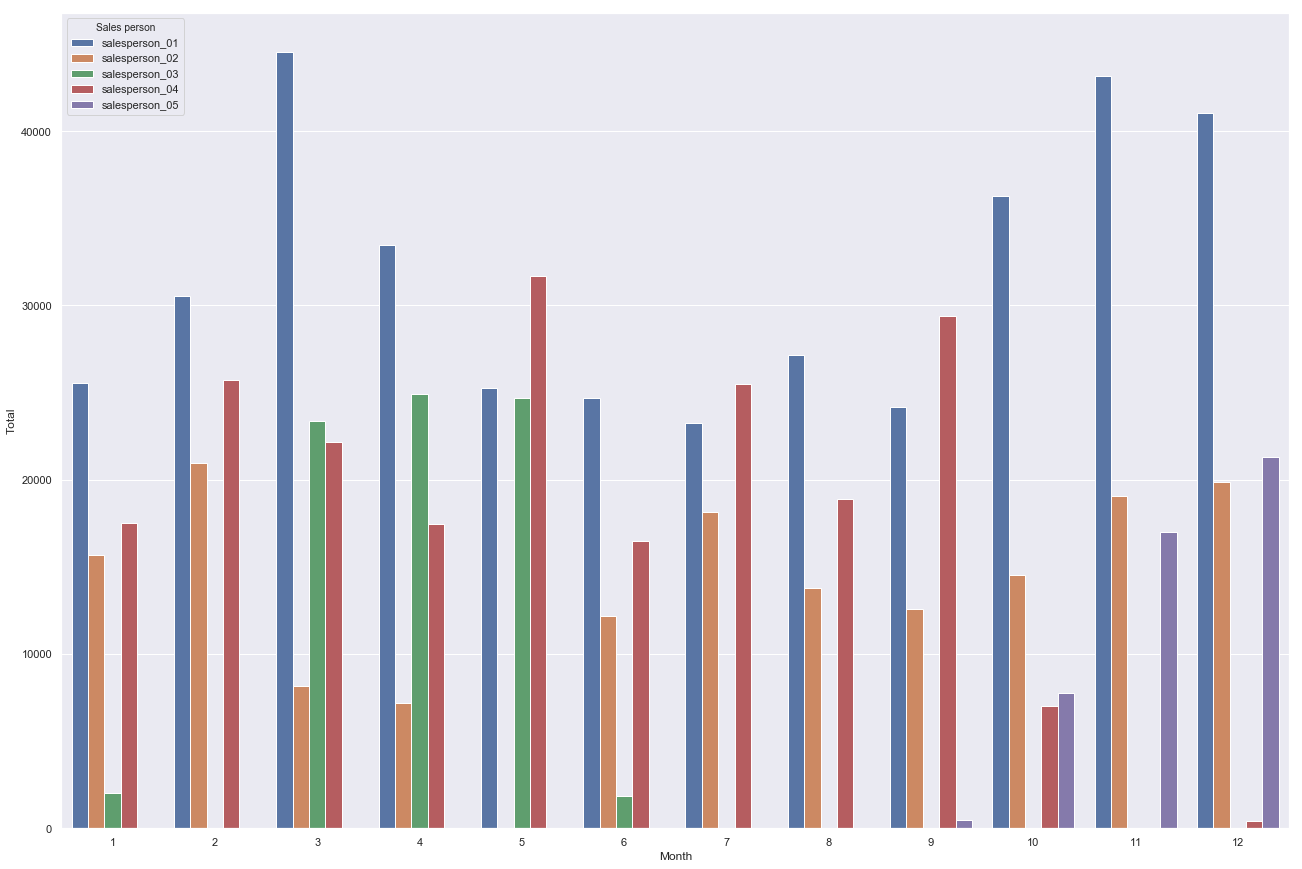

In [10]:
sns.barplot(x='Month', y='Total', data=df, 
            estimator=sum, 
#             palette = 'spring',
            hue='Sales person',
#             capsize = 0.1, 
            ci = None,
#             dodge = False
           )

# Sale by date

/anaconda3/envs/tfenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


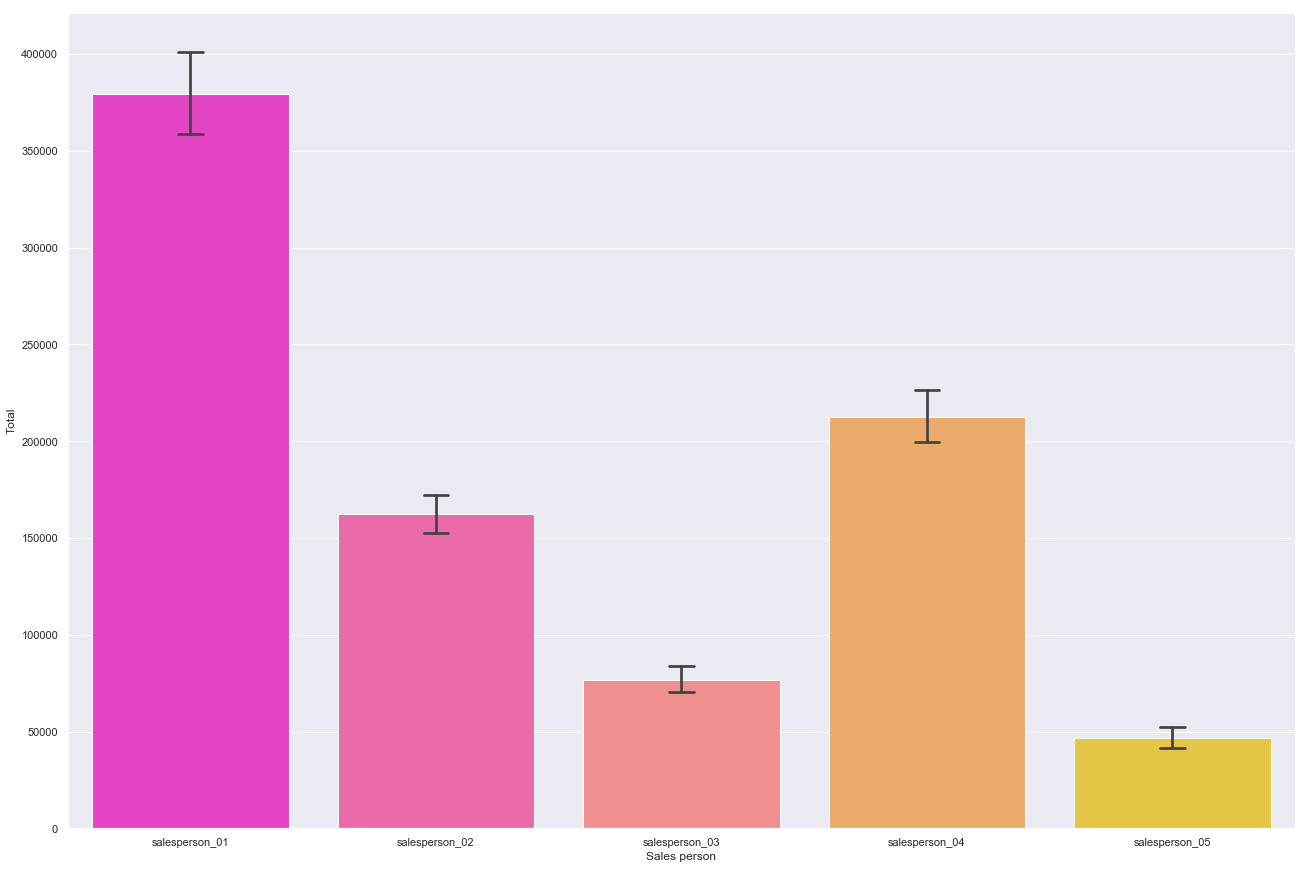

In [11]:
sns.barplot(x='Sales person', y='Total', data=df, 
            estimator=sum, 
            capsize = 0.1, 
            palette = 'spring', 
#             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
           )

In [12]:
df.to_csv('out.csv')

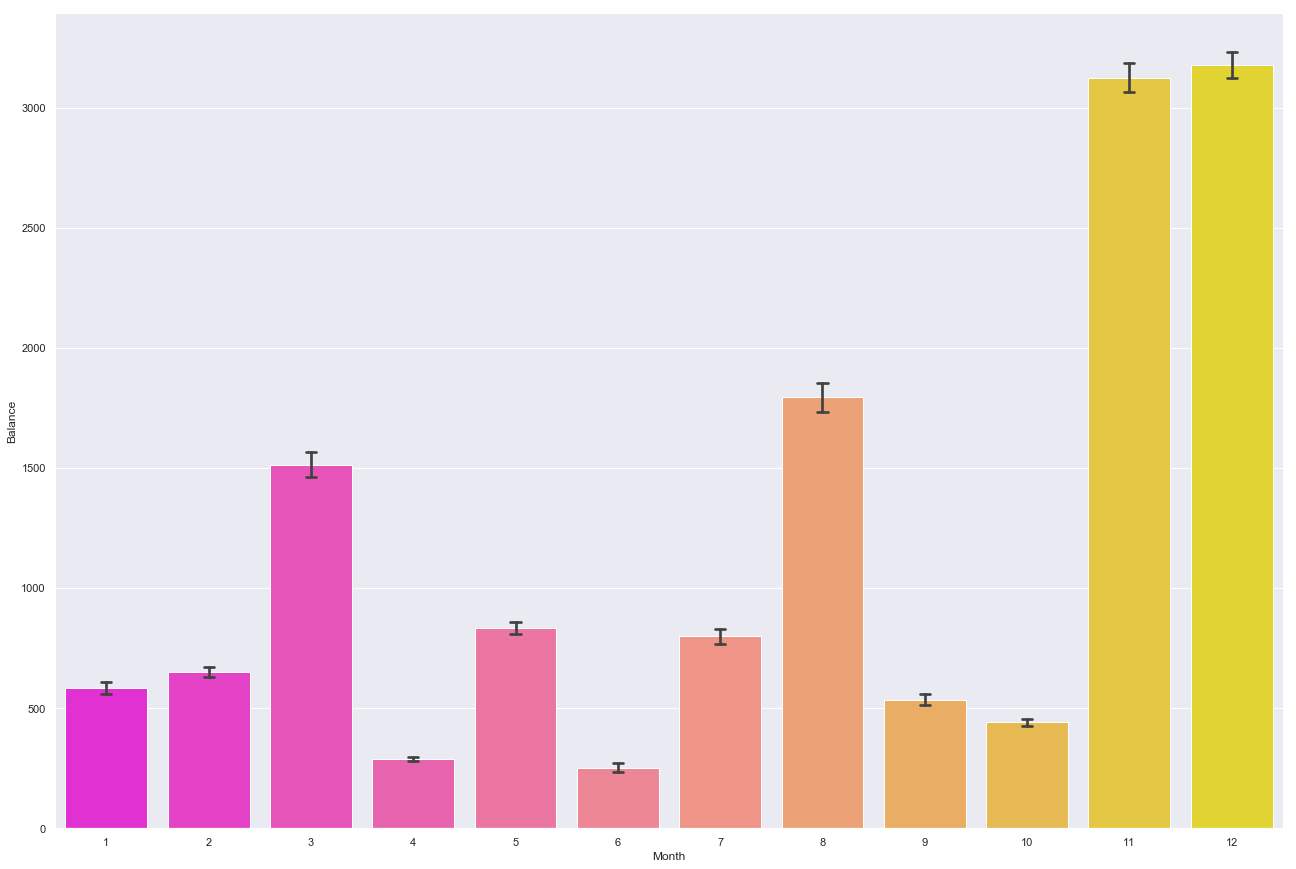

In [13]:
sns.barplot(x='Month', y='Balance', data=df, 
            estimator=sum, 
            capsize = 0.1, 
            palette = 'spring', 
#             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
            ci = 'sd'
           )

In [14]:
def rta_test(row):
    if row['Item Name'] == 'RTA Eye Test' :
        return 1
    return 0
df['RTA test'] = df.apply(lambda row: rta_test(row),axis=1)

/anaconda3/envs/tfenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


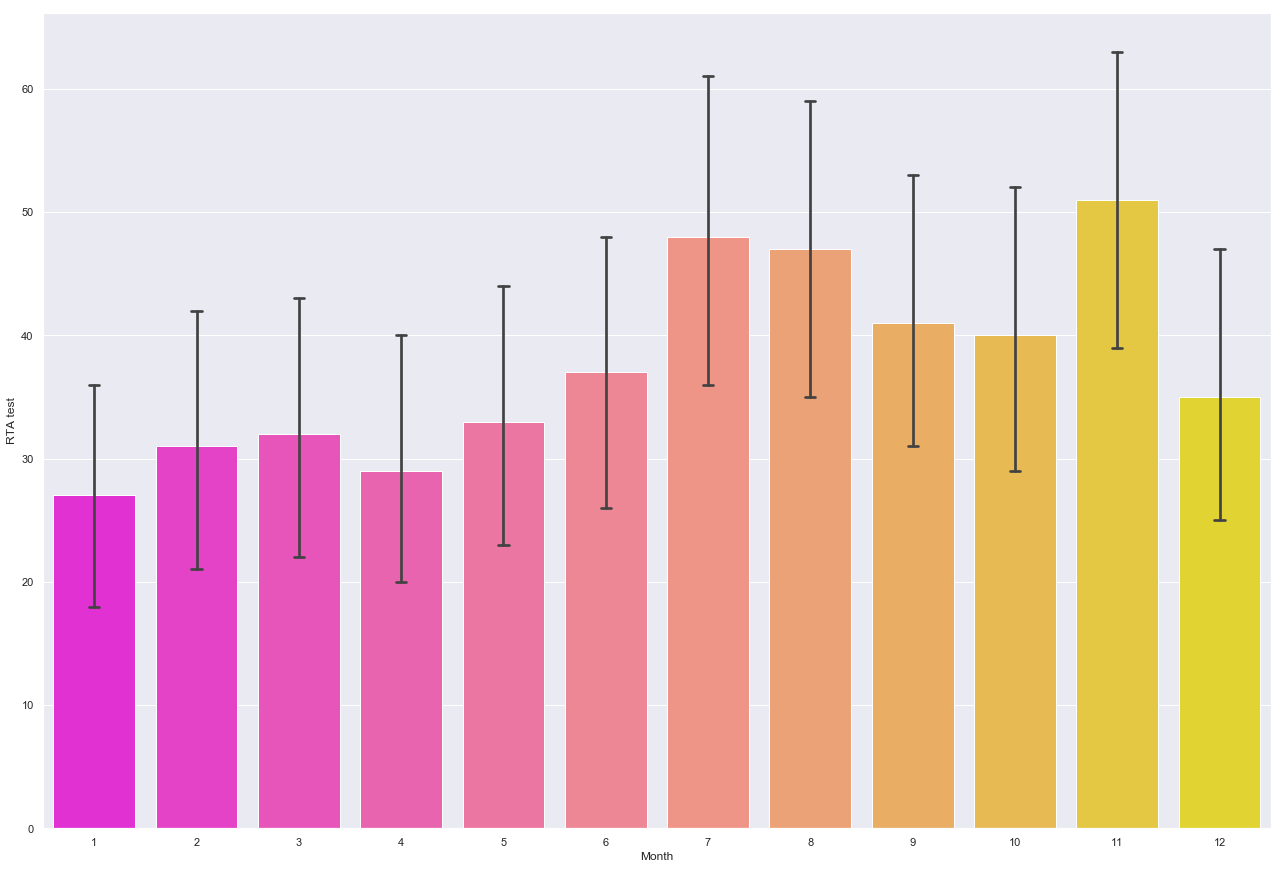

In [15]:
sns.barplot(x='Month', y='RTA test', data=df, 
            estimator=sum, 
            capsize = 0.1, 
            palette = 'spring', 
#             order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
           )

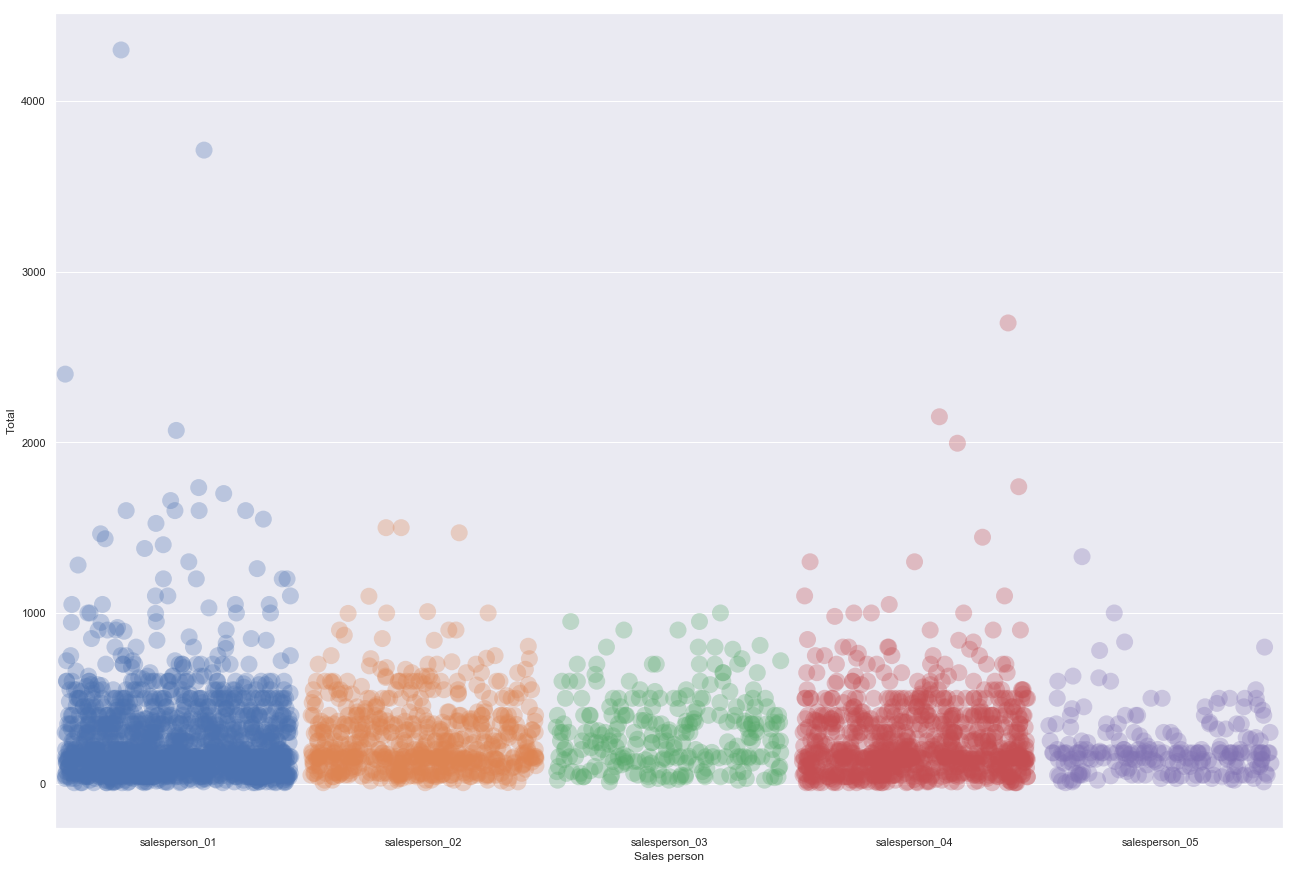

In [16]:
sns.stripplot(x='Sales person', 
              y='Total', 
              data = df,
              jitter=0.46, 
              size = 17, 
              alpha=0.3
             )

In [17]:
print("Salesperson_05 total sales: ", sum(df[df['Sales person'] == 'salesperson_05']['Total']))

Sharbina total sales:  46608.5


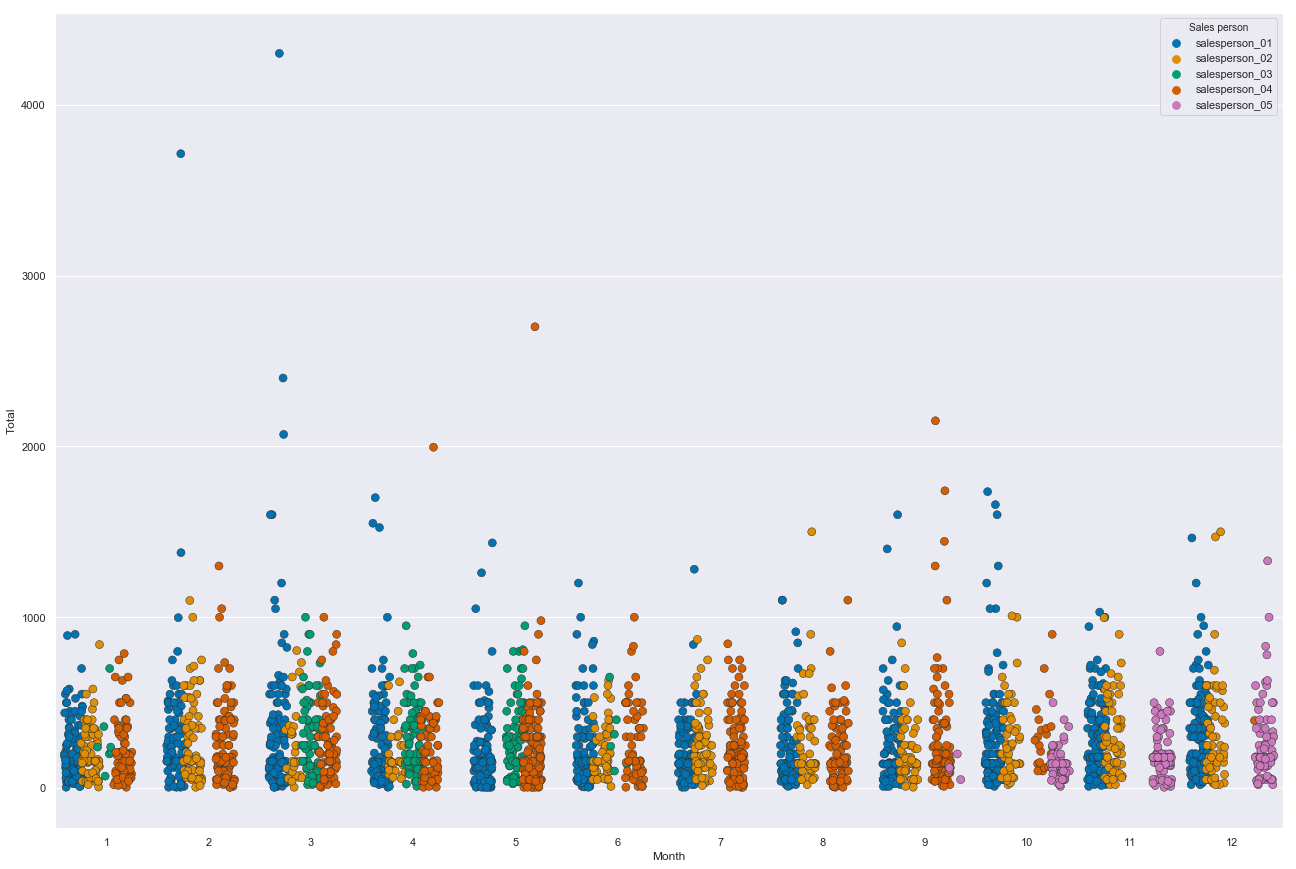

In [18]:
sns.stripplot(x='Month', 
              y='Total', 
              data = df,
              jitter=0.46,
              linewidth=0.5,
              dodge = True,
              hue='Sales person', 
              palette = 'colorblind', 
              size = 8, 
#               alpha = 0.4
             )
# sns.violinplot(x='Month', 
#                y='Total',
#                data = df,
#                )

In [19]:
df_nanSalesperson = (df[df['Sales person'].isnull()])
df_nanSalesperson = df_nanSalesperson.sort_values(by='Total')
df_nanSalesperson

,Unnamed: 0,Unnamed: 0.1,Invoice Date,Invoice Number,Item Name,Total,Balance,Sales person,Day month,Month,Day week,RTA test
219,219,219,2018-01-11,5832,EYE TEST,20.0,0.0,NaN,11,1,Thursday,0
168,168,168,2018-01-06,5815,EYE TEST,30.0,0.0,NaN,6,1,Saturday,0
216,216,216,2018-01-10,5830,READING GLASS,40.0,0.0,NaN,10,1,Wednesday,0
1040,1040,1040,2018-03-11,19932,CR 39,50.0,0.0,NaN,11,3,Sunday,0
4080,4080,4080,2018-11-24,21341,CR PG ARC,110.0,0.0,NaN,24,11,Saturday,0
1957,1957,1957,2018-05-23,20465,NaN,120.0,0.0,NaN,23,5,Wednesday,0
1877,1877,1877,2018-05-16,6467,Frame,150.0,0.0,NaN,16,5,Wednesday,0
2139,2139,2139,2018-06-07,20509,Frame,250.0,0.0,NaN,7,6,Thursday,0
1478,1478,1478,2018-04-21,20224,NaN,280.0,0.0,NaN,21,4,Saturday,0
2836,2836,2836,2018-08-08,20856,CR PG V2 ARC,300.0,0.0,NaN,8,8,Wednesday,0


In [20]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')